In [3]:
# Imports
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop

# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt

print('Libraries imported.')

/Users/danielmakin/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Libraries imported.


In [4]:
# Data Downloading

# Read all of the Necessary Images and add Labels

import os
from PIL import Image
import numpy as np
# Load the iCub Dataset
def load_images_from_folder():
    X = []
    y = []
    for i, f in enumerate(['book', 'cellphone', 'hairbrush', 'hairclip', 'mouse', 'pencilcase', 'perfume', 'ringbinder', 'sunglasses', 'wallet']):
        # Iterate through all files in the folder
        for filename in os.listdir(os.path.join('selected_images/', f)):
            # Check if the file is an image (you may want to add more file extensions)
            if filename.endswith((".jpg")):
                # Build the full path of the image file
                file_path = os.path.join(os.path.join('selected_images/', f), filename)
                # Open the image file
                img = Image.open(file_path)
                # Downsize the Images
                img = img.resize((32, 32))
                # Convert the image to a NumPy array
                img_array = np.array(img)
                X.append(img_array)
                y.append(i)
    return np.array(X), np.array(y)

X, y = load_images_from_folder()
print("Data Downloaded")

Data Downloaded


In [5]:
# Data Split 80:20
from sklearn.model_selection import train_test_split

# Get the Seperate Sets of Data
input_X_train, input_X_test, output_y_train, output_y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')
 
# Tell the model there are 10 classes
output_Y_train = utils.to_categorical(output_y_train, 10)
output_Y_test = utils.to_categorical(output_y_test, 10) 

# float and normalization
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255

input_X_train shape: (21362, 32, 32, 3)
21362 train samples
5341 test samples


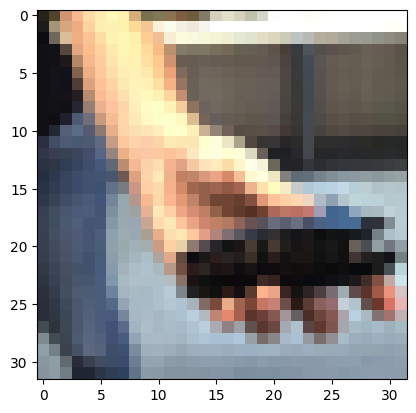

In [6]:
# Visualise an Image
image = input_X_train[2]
plt.imshow(image)
plt.show() 

In [7]:
# Define Training and Testing Function 

def compile_model(DROPOUT=0.25, LEARNING_RATE = 0.001):
    # network definition

    # Complex DNN model definition
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(32, kernel_size=3, padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(DROPOUT))
    
    model.add(Conv2D(64, kernel_size=3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, 3, 3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    print('CNN network definition.')


    # compile the model
    model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=LEARNING_RATE), metrics=['accuracy'])

    model.summary()

    return model


def train_and_test(model, BATCH_SIZE=128, N_EPOCH=40, VALIDATION_SPLIT=0.2):
    history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=1)

    return model, history

def display_results(model, history, BATCH_SIZE=128):
    #Testing
    score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=1)
    print("\nTest score/loss:", score[0])
    print('Test accuracy:', score[1])

    # list all data in history
    print(history.history.keys())

    # summarize history for accuracy
    #plt.plot(mo)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

### Test BATCH_SIZE

CNN network definition.
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_54 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_55 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_31 (Dropout)        (None, 16, 16, 32)        0         
                             

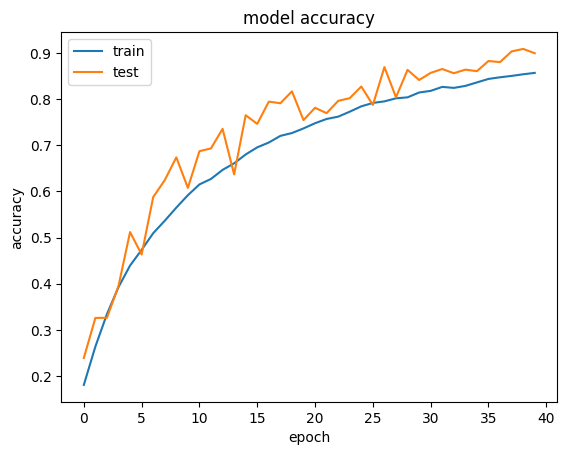

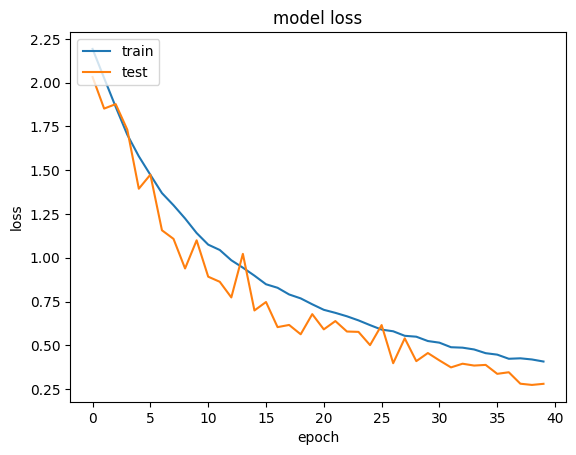

In [30]:
model = compile_model()

model, history = train_and_test(model, BATCH_SIZE=256)

display_results(model, history, BATCH_SIZE=256)


CNN network definition.
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_60 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_33 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_61 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_34 (Dropout)        (None, 16, 16, 32)        0         
                             

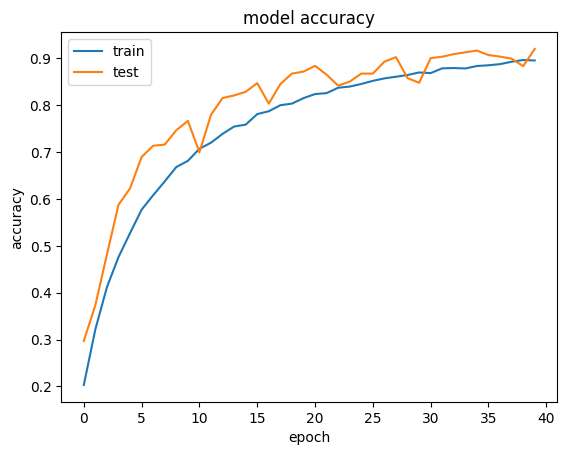

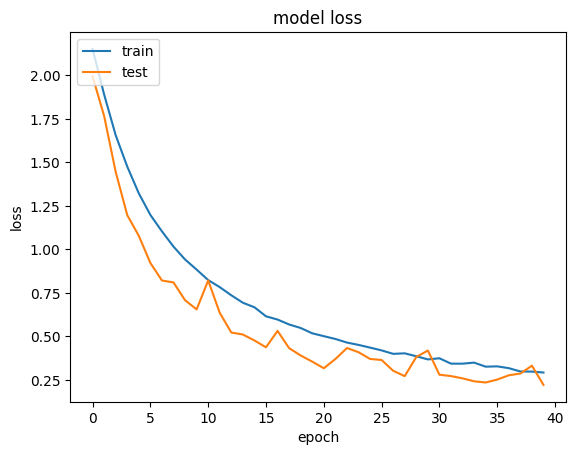

In [31]:
model = compile_model()

model, history = train_and_test(model, BATCH_SIZE=128)

display_results(model, history, BATCH_SIZE=128)


CNN network definition.
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_72 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_41 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_73 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_40 (Dropout)        (None, 16, 16, 32)        0         
                             

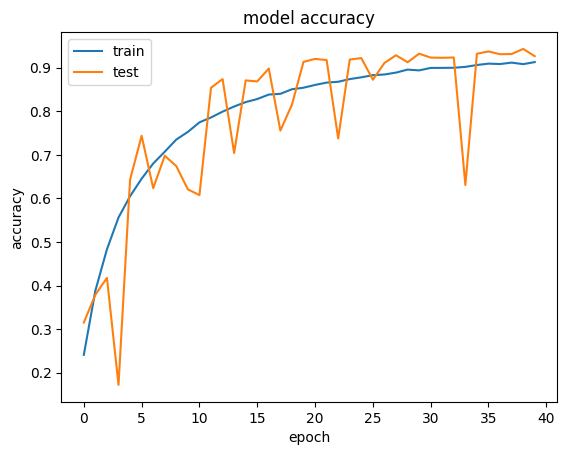

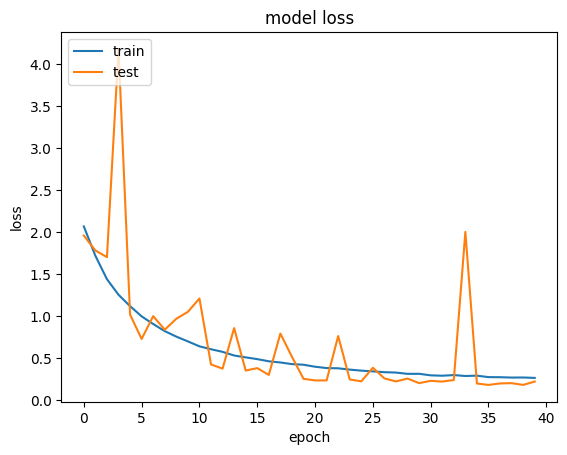

In [33]:
model = compile_model()

model, history = train_and_test(model, BATCH_SIZE=64)

display_results(model, history, BATCH_SIZE=64)


CNN network definition.
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_78 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_45 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_79 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_43 (Dropout)        (None, 16, 16, 32)        0         
                             

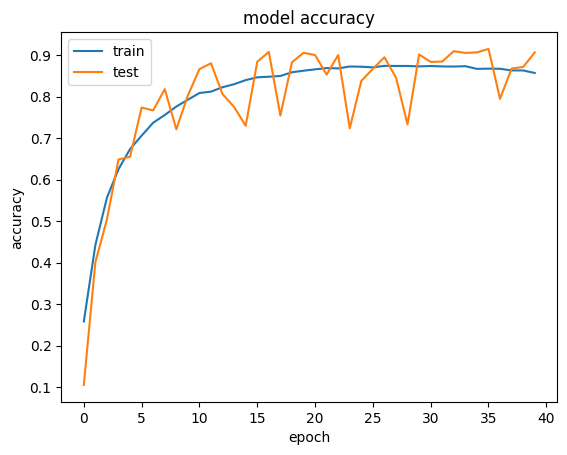

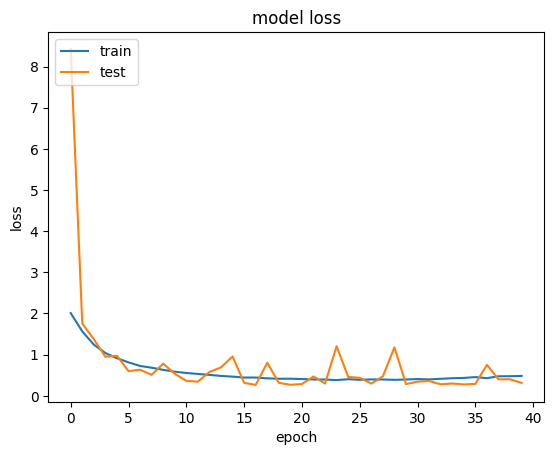

In [34]:
model = compile_model()

model, history = train_and_test(model, BATCH_SIZE=32)

display_results(model, history, BATCH_SIZE=32)


CNN network definition.
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_84 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_49 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_85 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_46 (Dropout)        (None, 16, 16, 32)        0         
                             

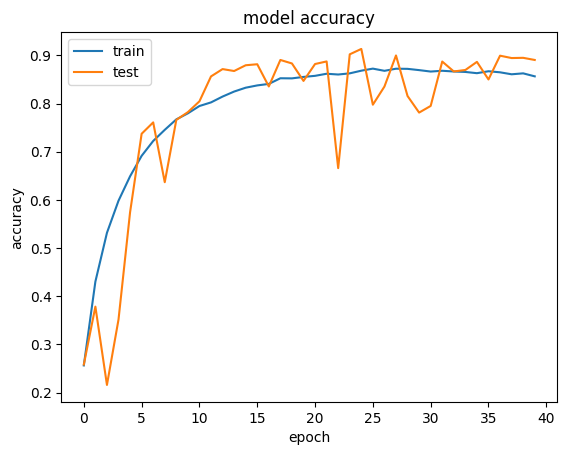

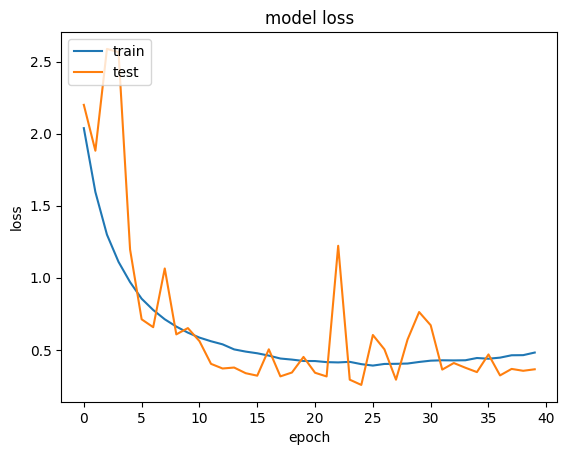

In [35]:
model = compile_model()

model, history = train_and_test(model, BATCH_SIZE=32)

display_results(model, history, BATCH_SIZE=32)

## Test Epochs

CNN network definition.
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_96 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_57 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_97 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_52 (Dropout)        (None, 16, 16, 32)        0         
                             

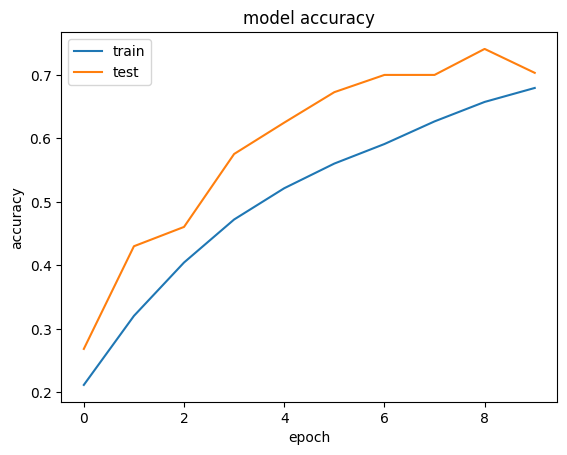

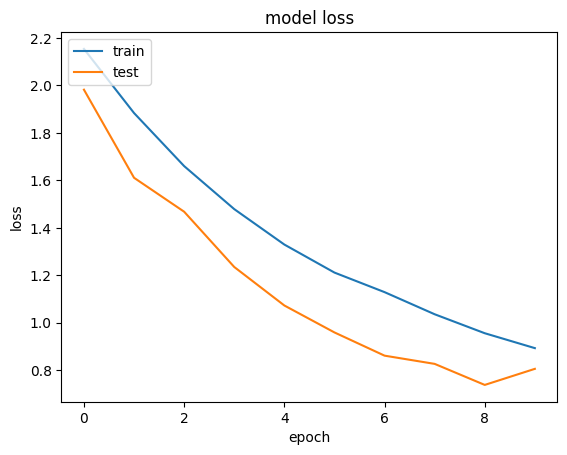

In [37]:
model = compile_model()

model, history = train_and_test(model, N_EPOCH=10)

display_results(model, history)


CNN network definition.
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_102 (Activation  (None, 32, 32, 32)        0         
 )                                                               
                                                                 
 conv2d_61 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_103 (Activation  (None, 32, 32, 32)        0         
 )                                                               
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                             

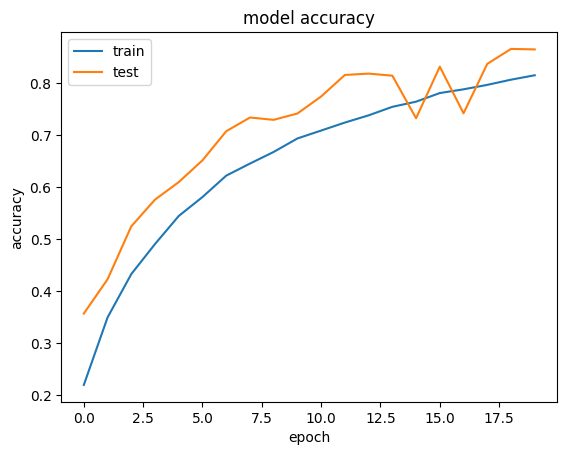

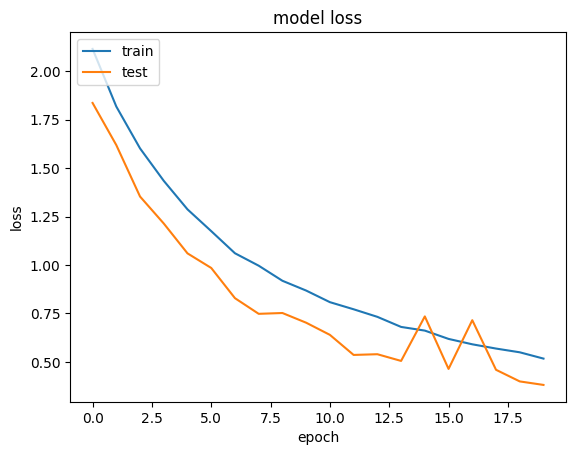

In [38]:
model = compile_model()

model, history = train_and_test(model, N_EPOCH=20)

display_results(model, history)


In [1]:
model = compile_model()

model, history = train_and_test(model, N_EPOCH=30)

display_results(model, history)

NameError: name 'compile_model' is not defined

CNN network definition.
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_68 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_114 (Activation  (None, 32, 32, 32)        0         
 )                                                               
                                                                 
 conv2d_69 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_115 (Activation  (None, 32, 32, 32)        0         
 )                                                               
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                             

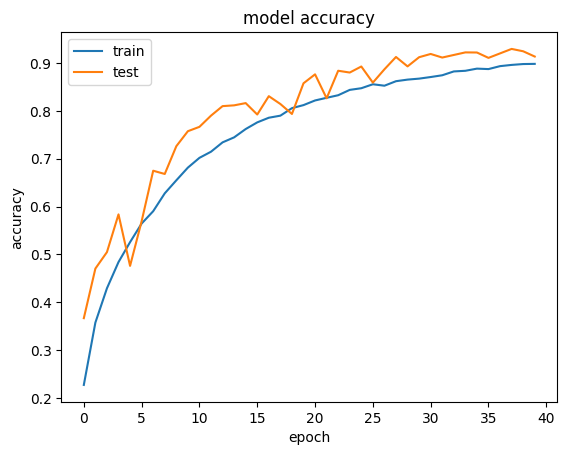

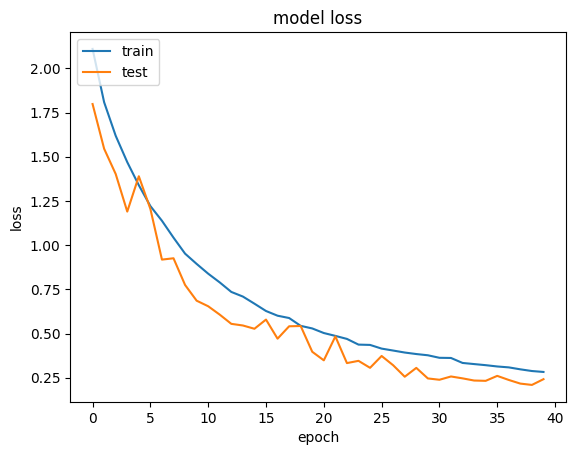

In [40]:
model = compile_model()

model, history = train_and_test(model, N_EPOCH=40)

display_results(model, history)

CNN network definition.
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_120 (Activation  (None, 32, 32, 32)        0         
 )                                                               
                                                                 
 conv2d_73 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_121 (Activation  (None, 32, 32, 32)        0         
 )                                                               
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                             

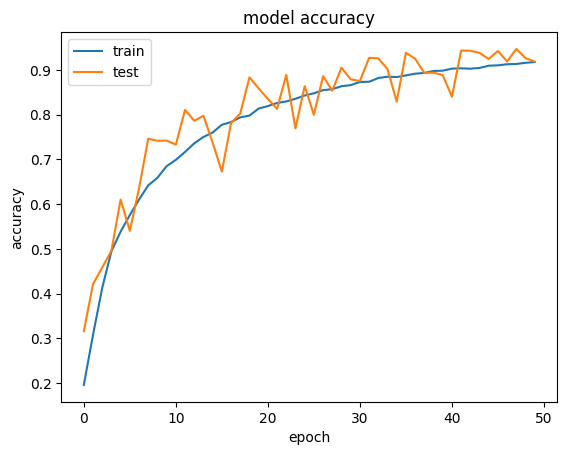

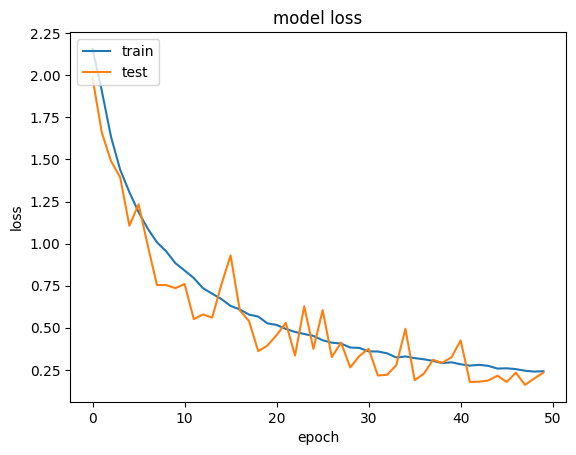

In [41]:
model = compile_model()

model, history = train_and_test(model, N_EPOCH=50)

display_results(model, history)

## Learning Rate

CNN network definition.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                

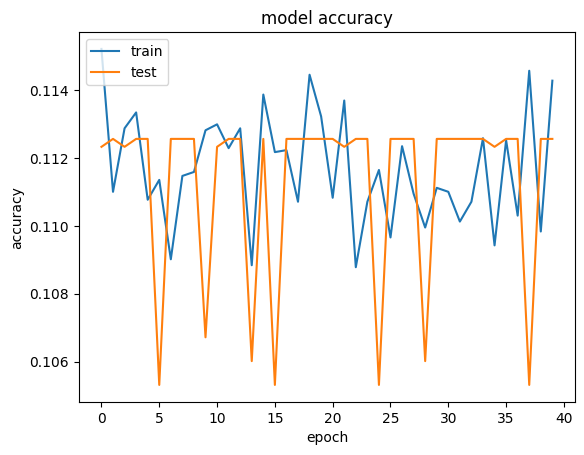

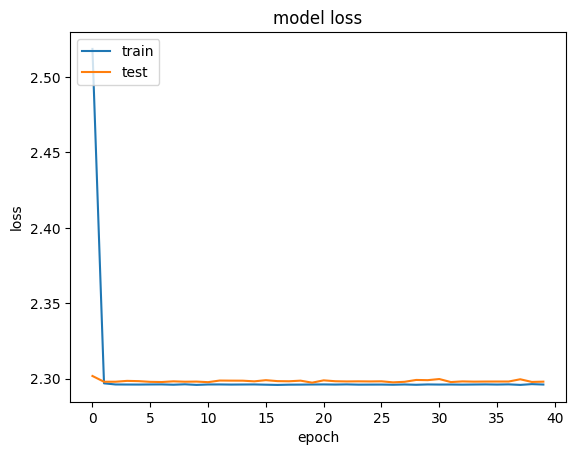

In [8]:
model = compile_model(LEARNING_RATE=0.01)

model, history = train_and_test(model)

display_results(model, history)

CNN network definition.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                              

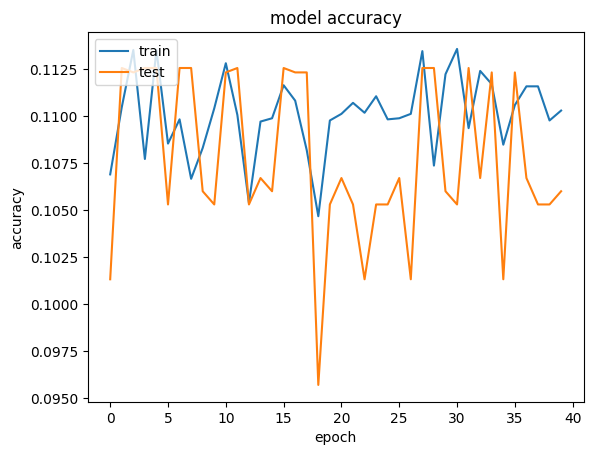

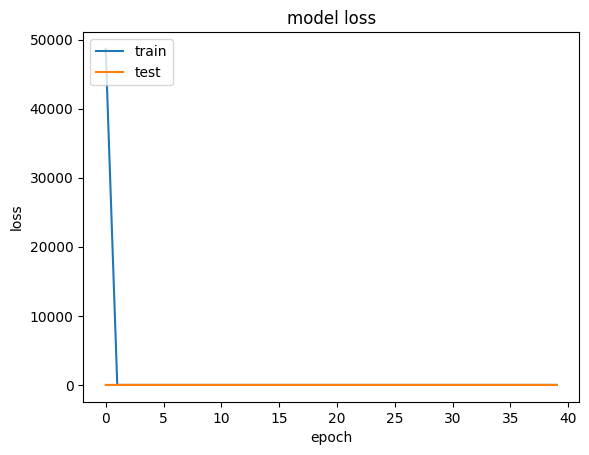

In [9]:
model = compile_model(LEARNING_RATE=0.1)

model, history = train_and_test(model)

display_results(model, history)

CNN network definition.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_12 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_13 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 32)        0         
                              

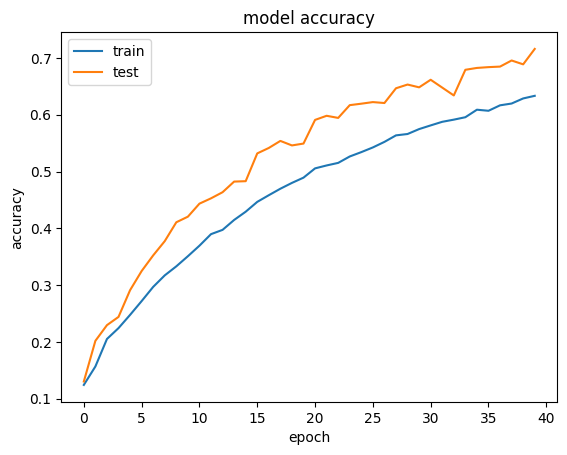

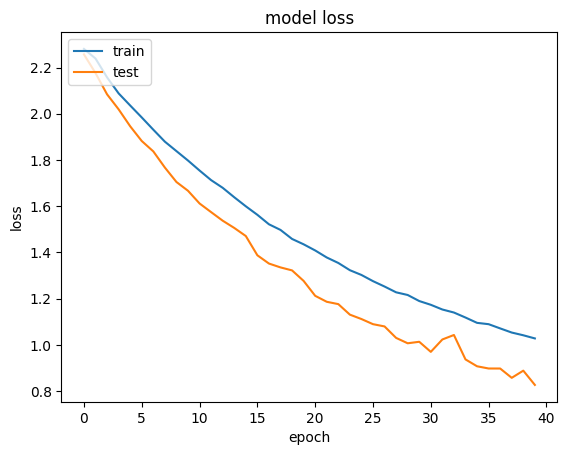

In [10]:
model = compile_model(LEARNING_RATE=0.0001)

model, history = train_and_test(model)

display_results(model, history)

In [ ]:
# DROPOUT LAYER

CNN network definition.
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_18 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_19 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 16, 16, 32)        0         
                              

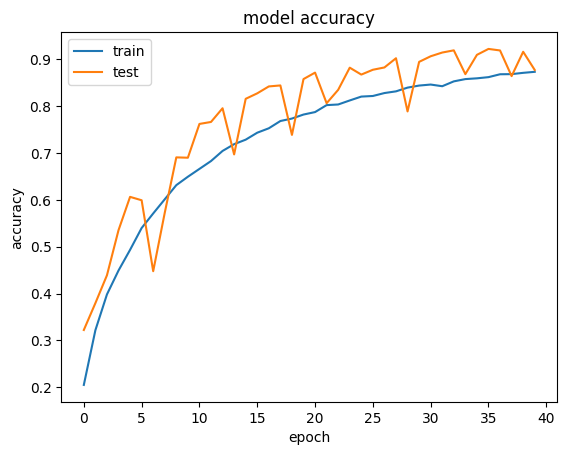

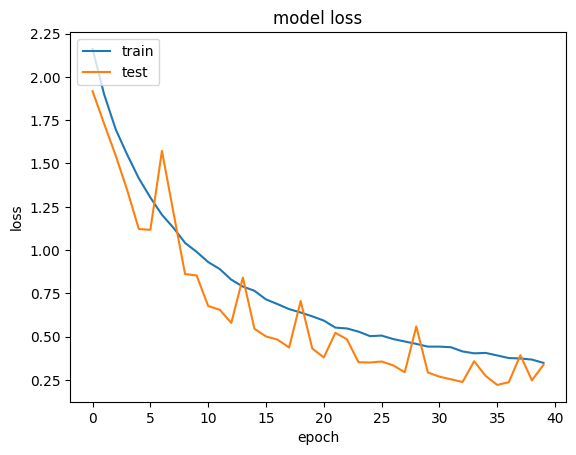

In [11]:
model = compile_model(DROPOUT=0.5)

model, history = train_and_test(model)

display_results(model, history)

CNN network definition.
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_24 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_25 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 16, 16, 32)        0         
                              

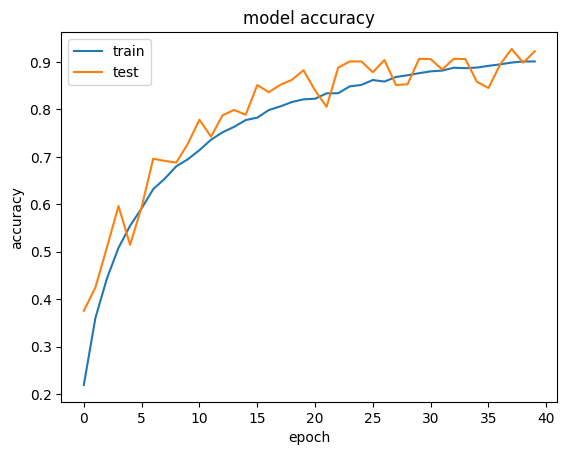

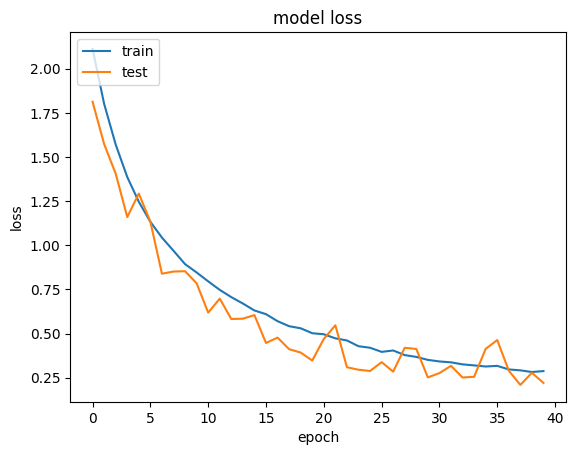

In [12]:
model = compile_model(DROPOUT=0.2)

model, history = train_and_test(model)

display_results(model, history)

CNN network definition.
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_30 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_31 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 16, 16, 32)        0         
                              

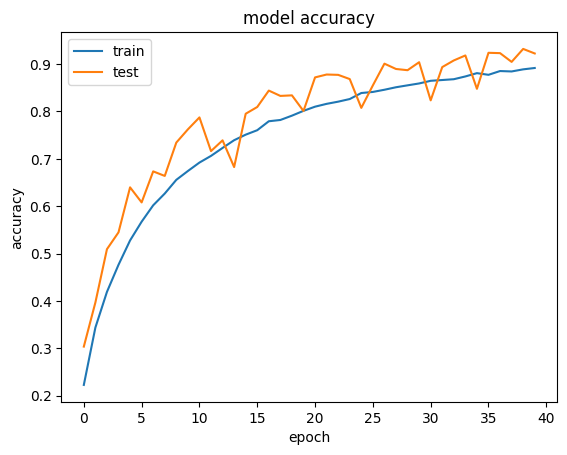

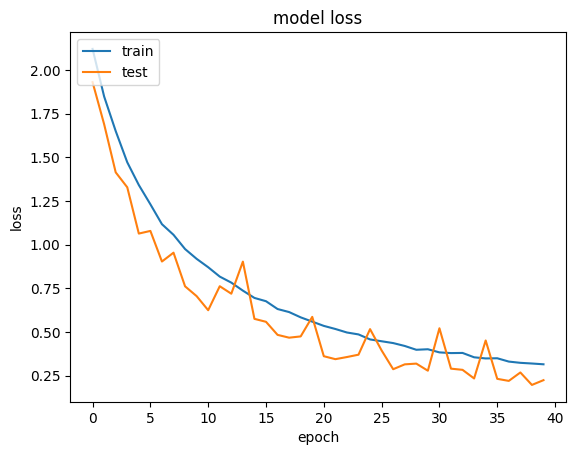

In [13]:
model = compile_model(DROPOUT=0.3)

model, history = train_and_test(model)

display_results(model, history)

CNN network definition.
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_36 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_37 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_18 (Dropout)        (None, 16, 16, 32)        0         
                              

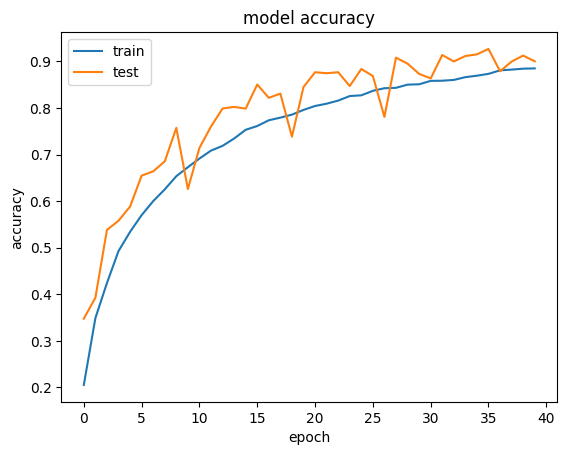

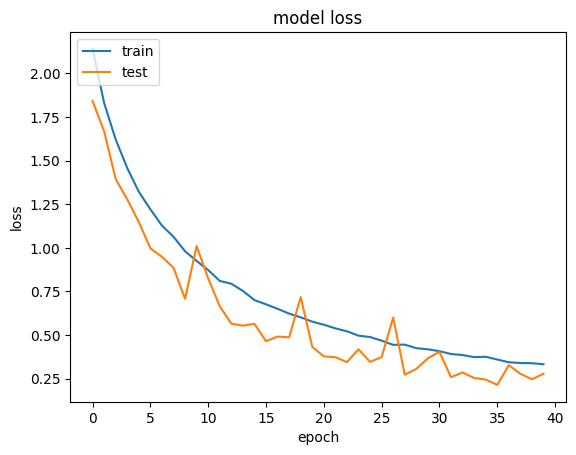

In [14]:
model = compile_model(DROPOUT=0.4)

model, history = train_and_test(model)

display_results(model, history)

CNN network definition.
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_48 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_33 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_49 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_24 (Dropout)        (None, 16, 16, 32)        0         
                              

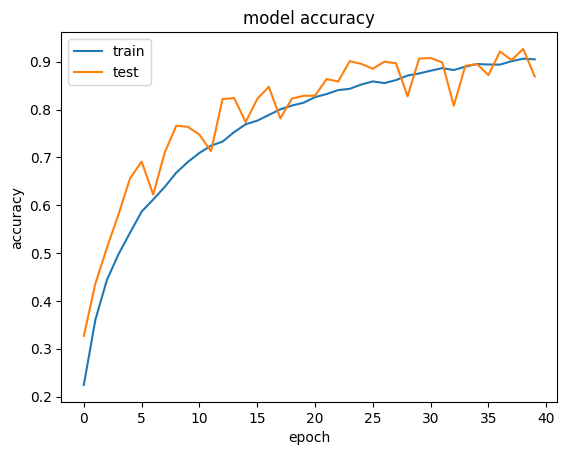

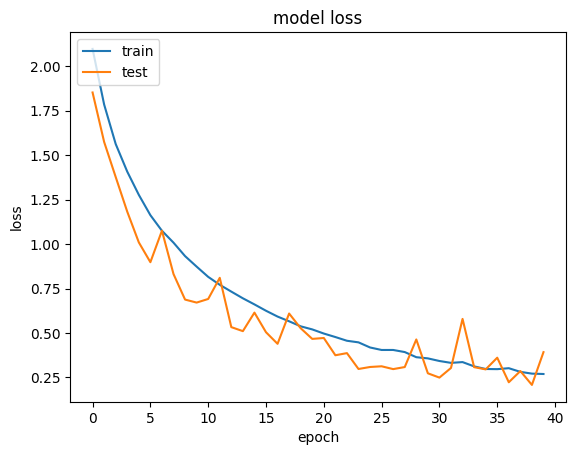

In [16]:
model = compile_model(DROPOUT=0.1)

model, history = train_and_test(model)

display_results(model, history)